# Predicting the type of Url by using Machine Learning Algorithms!

# _USE CASE:_

---

## _Let’s say we have to categorize web pages. Typically theys can be categorized under four heads:_
- E-commerce page (like Amazon)
- Listing page (like naukri, zomato etc)
- Article (landing page , Blogs)
- Video / images pages (YouTube etc)



### _Devise a function in which input is a URL and output is a prediction (predicting the input URL to be one of the above categories)_

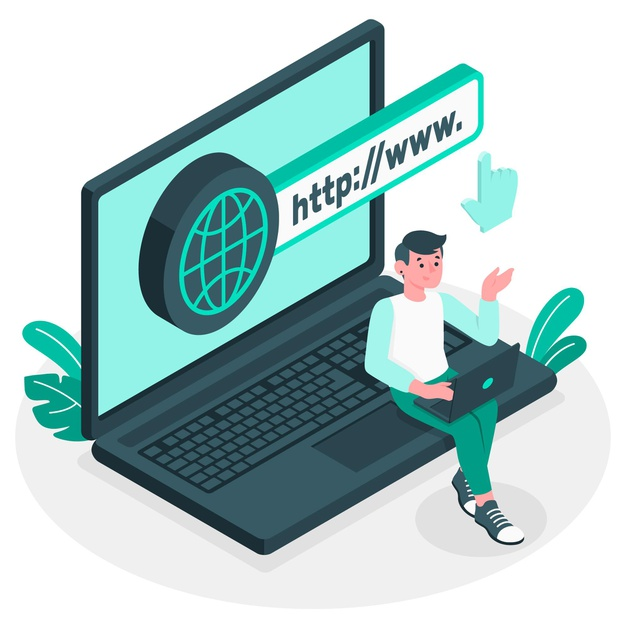

### _Importing Libraries:_

In [2]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

## Now, _Fistly i have searched the internet for the dataset and done some web scrapping and then sorted the dataset :_

### _Loading the Dataset_

In [5]:
df=pd.read_csv('url final sort dataset.csv')

In [6]:
df.head()

,url,type
0,http://www.graydon-group.com,ecommerce
1,http://www.nacminw.com/,ecommerce
2,http://www.chargeoffclearinghouse.com/,ecommerce
3,http://www.cfsi.net/,ecommerce
4,http://www.debtmarketplace.com/,ecommerce


In [7]:
df.tail()

,url,type
653303,http://www.maxpreps.com/,Listing
653304,http://www.myscore.com/,Listing
653305,http://Listingillustrated.cnn.com/highschool,Listing
653306,http://rss.cnn.com/rss/si_highschool?format=xml,Listing
653307,http://www.usatoday.com/Listing/preps/,Listing


## _Checking for null values in this dataset :_

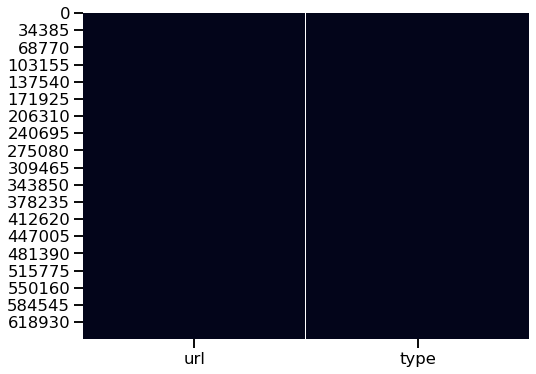

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(), cbar=False)
sns.set_context('talk')

##### So, no null values to take care of!

---

## _Exploratory Data Analysis and Visualizations:_

In [8]:
df.shape

(653308, 2)

In [25]:
df.describe()

,url,type
count,653306,653306
unique,642943,4
top,http://www.wildwebwoods.org/,ecommerce
freq,6,208322


Text(0, 0.5, 'Total Number of url count')

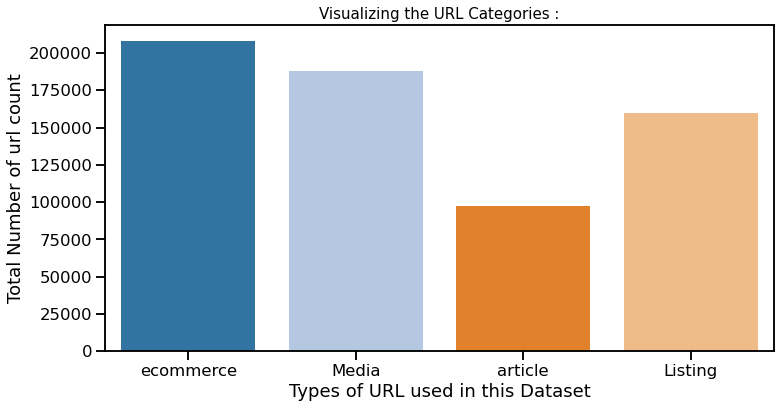

In [29]:
plt.figure(figsize=(12,6))
g = sns.countplot(x='type',data=df, palette='tab20')
plt.title("Visualizing the URL Categories :", size =15)
plt.xlabel('Types of URL used in this Dataset')
plt.ylabel('Total Number of url count')

## _Now, Loading the Test Dataset_

In [9]:
dtest=pd.read_csv('url test dataset.csv')

In [10]:
dtest.head()

,url,type
0,http://catalog.bravomusicinc.com/,ecommerce
1,http://www.trombonamusic.com,ecommerce
2,http://www.americanbrassworks.com/,ecommerce
3,http://www.globalviewmusic.com/sheetmusic/inde...,ecommerce
4,http://gigavux.tripod.com/brand-x.html,ecommerce


### _Visualizing test dataset_

Text(0, 0.5, 'Total Number of url count')

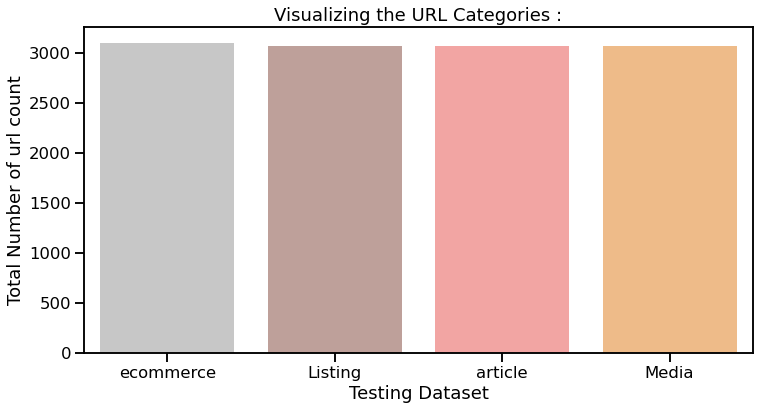

In [39]:
plt.figure(figsize=(12,6))
g = sns.countplot(x='type',data=dtest, palette='tab20_r')
plt.title("Visualizing the URL Categories :", size =18)
plt.xlabel('Testing Dataset')
plt.ylabel('Total Number of url count')

In [18]:
#X_train = df['url']
#y_train = df['type']

In [19]:
#X_test = dtest['url']
#y_test = dtest['type']

In [ ]:
# url_clf = url_clf.fit(X_train, y_train)

---

# Making the model for Prediction :

In [110]:
dft=pd.read_csv('url final sort dataset.csv')

In [114]:
dft.head()

,url,type
0,http://www.graydon-group.com,ecommerce
1,http://www.nacminw.com/,ecommerce
2,http://www.chargeoffclearinghouse.com/,ecommerce
3,http://www.cfsi.net/,ecommerce
4,http://www.debtmarketplace.com/,ecommerce


### _For solving the rerror : ValueError: np.nan is an invalid document<br> converting the dtype object to unicode string_

In [112]:
dft['url']= dft.url.astype('U')

In [113]:
dft['type']= dft.type.astype('U')

## _Term freq. and Inverse doc freq. - TF-IDF from NLP_

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:
url_tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1)).fit(dft['url'])

## _Independent and dependent features_

In [116]:
X = url_tfidf.transform(dft['url'])

In [117]:
y = dft['type'].values

In [120]:
y

array(['ecommerce', 'ecommerce', 'ecommerce', ..., 'Listing', 'Listing',
       'Listing'], dtype=object)

## _Train-Test Split_

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
# _using Stochastic gradient descent classifier_

In [160]:
from sklearn.linear_model import SGDClassifier
clf = sklearn.linear_model.SGDClassifier(loss='hinge', class_weight='balanced', max_iter=1000, verbose=0, n_jobs=-1,n_iter_no_change=30, average=32)

In [158]:
clf.fit(X_train, y_train)

SGDClassifier(average=32, class_weight='balanced', n_iter_no_change=30,
              n_jobs=-1)

In [164]:
from sklearn.metrics import accuracy_score
sgd_acc = accuracy_score(clf.predict(X_test), y_test)
sgd_acc

0.620203272565857

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

D:\Software\Anaconda Ankur\Files\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda Ankur\Files\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Listing       0.75      0.51      0.61     31772
       Media       0.66      0.56      0.60     37883
     article       0.56      0.48      0.51     19465
   ecommerce       0.58      0.83      0.68     41542
         nan       0.00      0.00      0.00         0

    accuracy                           0.62    130662
   macro avg       0.51      0.48      0.48    130662
weighted avg       0.64      0.62      0.62    130662



D:\Software\Anaconda Ankur\Files\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
# _I will be now be using Multinomial Naive Bayes Classifier_

In [123]:
from sklearn.naive_bayes import MultinomialNB

In [124]:
nb_clf = MultinomialNB()

In [125]:
X.shape, y.shape

((653308, 575547), (653308,))

In [126]:
nb_clf.fit(X_train, y_train)

MultinomialNB()

In [127]:
from sklearn.metrics import classification_report

## _Predicting_

In [134]:
y_pred = nb_clf.predict(X_test)

### _Accuracy Score_

In [140]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)

In [141]:
accuracy

0.629976580796253

### _Confusion Matrix_

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
conf= confusion_matrix(y_test, y_pred)

In [138]:
conf

array([[16692,  6135,   118,  8827],
       [ 1933, 23996,   231, 11723],
       [ 1918,  5187,  5766,  6594],
       [ 1204,  4301,   177, 35860]], dtype=int64)

## _Classification Report_

In [130]:
predicted = nb_clf.predict(X_train)

In [132]:
print(classification_report(y_train, predicted))

D:\Software\Anaconda Ankur\Files\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Software\Anaconda Ankur\Files\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Listing       0.91      0.93      0.92    127802
       Media       0.86      0.96      0.91    150210
     article       0.97      0.47      0.63     77852
   ecommerce       0.85      0.95      0.90    166780
         nan       0.00      0.00      0.00         2

    accuracy                           0.88    522646
   macro avg       0.72      0.66      0.67    522646
weighted avg       0.89      0.88      0.87    522646



D:\Software\Anaconda Ankur\Files\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Listing       0.77      0.53      0.62     31772
       Media       0.61      0.63      0.62     37883
     article       0.92      0.30      0.45     19465
   ecommerce       0.57      0.86      0.69     41542

    accuracy                           0.63    130662
   macro avg       0.71      0.58      0.59    130662
weighted avg       0.68      0.63      0.62    130662



---
# _Conclusion :_

### _In the above given task, i have tried to make the prediction required i.e., predicting the input URL to be one of the above categories_
---

### _For completing this task, I have :_
- Searched the internet for the dataset and then sorted the dataset which took time to do.
- Checked for the Null values
- Did Exploratory Data Analysis and Visualization


- Made Model for doing the Prediction
- involving `NATURAL LANGUAGE PROCESSING`


- And used `SGD Classifier` as well as `Multinomil Naive Bayes Classifier` for doing the Prediction.
- Printed the Accuracy score and Confusion Matrix followed by the Classification report.